In [1]:
from scipy.ndimage.measurements import label as bwlabel
from skimage.measure import regionprops
from pylab import *

import seaborn as sns

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
sns.set()
rcParams['figure.figsize'] = (12, 8)

sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context("poster")

In [3]:
def percolation_matrix(p, L):
    """Creates and returns a labeled percolation matrix, and the number of clusters."""
    prob_matrix = rand(L, L)
    perc_matrix = prob_matrix < p
    label_perc_matrix, n_clusters = bwlabel(perc_matrix)
    return label_perc_matrix, n_clusters, perc_matrix

In [4]:
%%time

def find_ppie(search_area, L, x, simulations_per_p=1000):
    Pie = zeros(len(search_area))
    
    for i, prob in enumerate(search_area):
        simulation_i = 0
        
        while simulations_per_p > simulation_i:
            lw, num, z = percolation_matrix(prob, L)
            
            perc_h = intersect1d(lw[0, :], lw[-1, :])
            perc_v = intersect1d(lw[:, 0], lw[:, -1])
            perc = concatenate((perc_h[where(perc_h > 0)], perc_v[where(perc_v > 0)]), axis=0)
            perc = unique(perc)
            
            if len(perc) > 0:
                Pie[i] += 1
            simulation_i += 1    
            
    Pie[:] /= simulations_per_p
    closest_value = argmin(abs(Pie - x))
    error = (Pie - x)[closest_value]
    ppiex = search_area[closest_value]    
    return ppiex, Pie, error


search_area = array([0.5 + 0.001*i for i in range(100)])
L = 100
x = 0.3

print(search_area)
ppiex, Pie, error = find_ppie(search_area, L, x)
print(Pie)
print("ppiex computed with a error: {}".format(error))

[0.5   0.501 0.502 0.503 0.504 0.505 0.506 0.507 0.508 0.509 0.51  0.511
 0.512 0.513 0.514 0.515 0.516 0.517 0.518 0.519 0.52  0.521 0.522 0.523
 0.524 0.525 0.526 0.527 0.528 0.529 0.53  0.531 0.532 0.533 0.534 0.535
 0.536 0.537 0.538 0.539 0.54  0.541 0.542 0.543 0.544 0.545 0.546 0.547
 0.548 0.549 0.55  0.551 0.552 0.553 0.554 0.555 0.556 0.557 0.558 0.559
 0.56  0.561 0.562 0.563 0.564 0.565 0.566 0.567 0.568 0.569 0.57  0.571
 0.572 0.573 0.574 0.575 0.576 0.577 0.578 0.579 0.58  0.581 0.582 0.583
 0.584 0.585 0.586 0.587 0.588 0.589 0.59  0.591 0.592 0.593 0.594 0.595
 0.596 0.597 0.598 0.599 0.6   0.601 0.602 0.603 0.604 0.605 0.606 0.607
 0.608 0.609 0.61  0.611 0.612 0.613 0.614 0.615 0.616 0.617 0.618 0.619
 0.62  0.621 0.622 0.623 0.624 0.625 0.626 0.627 0.628 0.629 0.63  0.631
 0.632 0.633 0.634 0.635 0.636 0.637 0.638 0.639 0.64  0.641 0.642 0.643
 0.644 0.645 0.646 0.647 0.648 0.649 0.65  0.651 0.652 0.653 0.654 0.655
 0.656 0.657 0.658 0.659 0.66  0.661 0.662 0.663 0.

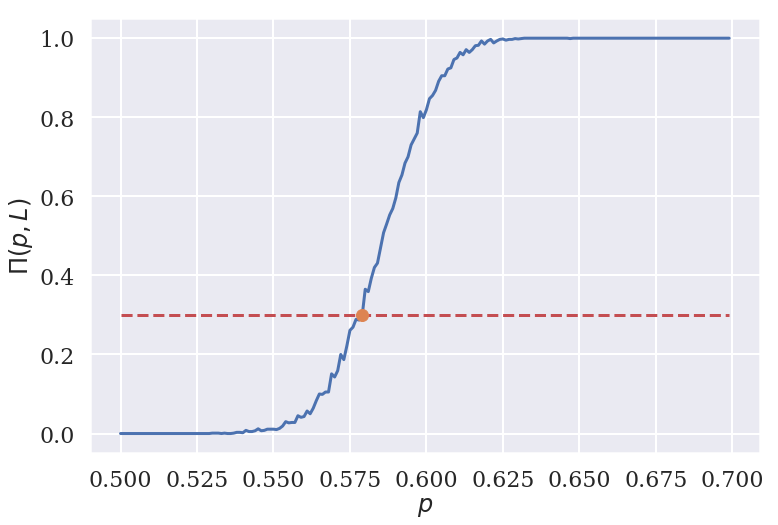

In [5]:
plot(search_area, Pie)
plot([ppiex], [x], 'o')
hlines(x, search_area[0], search_area[-1], 'r', '--')
xlabel(r"$p$")
ylabel(r"$\Pi (p, L)$")
show()

In [6]:
Ls = [25, 50, 100, 200, 400, 800]
xs = [0.3, 0.8]

ppiex_ = zeros((len(xs), len(Ls)))
search_area = array([0.55 + 0.0005*i for i in range(200)])


for i, x in enumerate(xs):
    for j, L in enumerate(Ls):
        ppiex, Pie, error = find_ppie(search_area, L, x)
        print("ppiex = {}, L = {}, x = {}, with absolute error {:.8g} for MCC = 1000".format(ppiex, L, x, error))
        ppiex_[i, j] = ppiex

ppiex = 0.552, L = 25, x = 0.3, with absolute error 0 for MCC = 1000
ppiex = 0.5695, L = 50, x = 0.3, with absolute error 0.003 for MCC = 1000
ppiex = 0.578, L = 100, x = 0.3, with absolute error -0.003 for MCC = 1000
ppiex = 0.5835, L = 200, x = 0.3, with absolute error 0.006 for MCC = 1000
ppiex = 0.588, L = 400, x = 0.3, with absolute error 0.025 for MCC = 1000


KeyboardInterrupt: 

In [ ]:
pc = 0.59275

fig = figure()

plot(Ls, ppiex_[1, :], label=r"$p_{\Pi=0.8}$")
plot(Ls, ppiex_[0, :], label=r"$p_{\Pi=0.3}$")
axhline(pc, c="red", ls='--', label=r"$p_c$")


ylabel(r"$p$")
xlabel(r"$L$")
legend()
show()

In [ ]:
ppiex = array([[0.5505, 0.5655, 0.578, 0.5845, 0.588, 0.5895],
              [0.605, 0.5995, 0.5969, 0.5955, 0.595, 0.594]])

L = array([25, 50, 100, 200, 400, 800])

plot(L, ppiex[0])
plot(L, ppiex[1])